## Titanic Survival Project
The content of this project will consist of training and testing various machine learning models utilizing the Titanic dataset provided by Kaggle. The goal is to try and successfully predict if a passenger survived based off of numerous features, such as sex, ticket class, fare, age, etc.

In [1]:
!pip install kaggle

In [2]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Some Exploratory Data Analysis
We attempt to recognize relationships between features, hopefully giving us better insights as to how to train future models.

In [7]:
#Calculating the proportion of men and women that survived respectively, 
#as well as the proportion of women out of the total that survived.

df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']

prop_male_survived = df_male['Survived'].mean()
prop_female_survived = df_female['Survived'].mean()

print('Proportion of men survived out of all men:', prop_male_survived, 
    '\nProportion of women survived out of all women',prop_female_survived)

total_females_survived_proportion = sum(df_female['Survived'])/sum(df['Survived'])
print('Proportion of women survived out of all survivors:', total_females_survived_proportion)


Proportion of men survived out of all men: 0.18890814558058924 
Proportion of women survived out of all women 0.7420382165605095
Proportion of women survived out of all survivors: 0.6812865497076024


In [8]:
#One hot encode sex and embarked column
df_enc = pd.get_dummies(df,columns=['Sex','Embarked'])
df_test_enc = pd.get_dummies(df_test,columns = ['Sex','Embarked'])

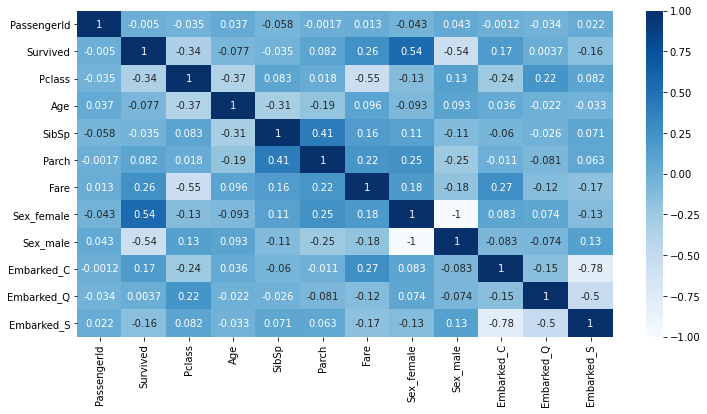

In [9]:
#Show pearson correlation for dataset features

plt.figure(figsize=(12,6))
sns.heatmap(df_enc.corr(), annot=True, cmap = 'Blues')
plt.show()

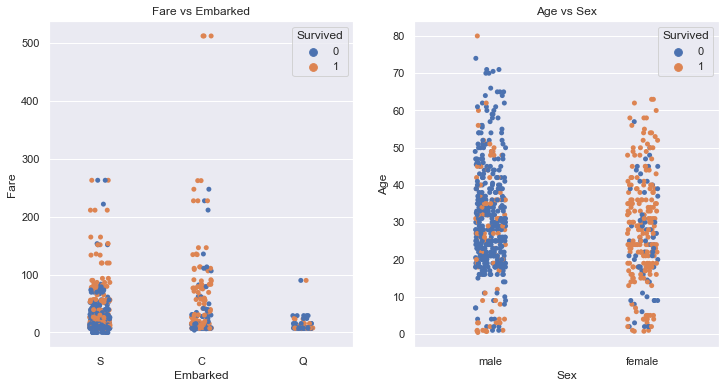

In [85]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.set(style='darkgrid')
fig1 = sns.stripplot(y='Fare', x='Embarked', hue='Survived', data = df, ax=axes[0])
fig2 = sns.stripplot(y='Age', x = 'Sex', hue='Survived', data=df, ax=axes[1])
fig1.set_title('Fare vs Embarked')
fig2.set_title('Age vs Sex')
fig1.grid(True, axis='y')
fig2.grid(True, axis='y')


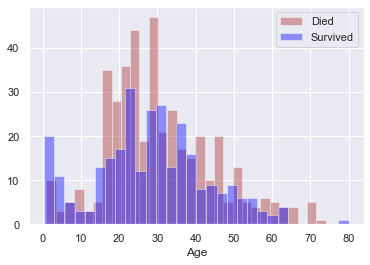

In [86]:
df_survived = df[df['Survived'] == 1]
df_died = df[df['Survived'] == 0]
ax1 = sns.distplot(df_died.Age, bins = 30, kde=False, label='Died', color='brown')
ax2 = sns.distplot(df_survived.Age, bins=30, kde=False, label='Survived', color='blue')
plt.legend()

Observe that both the distribution of a passengers age is close to normal, except for children of age < 10, where there is also a spike in survival rate. This suggests further exploration of the parent survival rate.

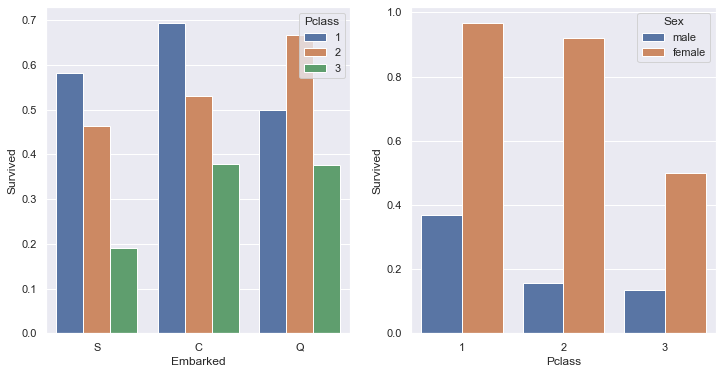

In [93]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

fig1 = sns.barplot(x ='Embarked', y='Survived', hue='Pclass', data = df, ax=axes[0], ci=None)
fig2 = sns.barplot(x='Pclass', y = 'Survived', hue='Sex', data=df, ax=axes[1], ci=None)
fig1.grid(True, axis='y')
fig2.grid(True, axis='y')
fig1.set_axisbelow(True)
fig2.set_axisbelow(True)

In [78]:
#TODO: explore the relationship between passengers having children vs ones that do not, and visualize their survival

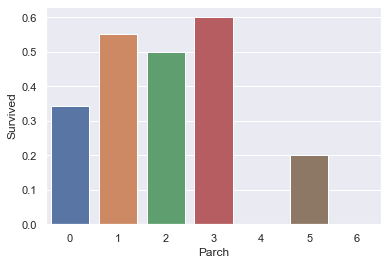

In [79]:
fig = sns.barplot(x='Parch', y='Survived', data=df, ci=None)
plt.grid(True, axis='y')
fig.set_axisbelow(True)

# Model Creation and Evaluation

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import StandardScaler

In [15]:
df_enc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [16]:
#Replace missing age values with the mean age, 29.
df_enc['Age'].fillna(value=df['Age'].mean(), inplace = True)
df_test_enc['Age'].fillna(value=df_test['Age'].mean(), inplace = True)

In [17]:
#Define training feature matrix as well as training target variable
X_train = df_enc[['Sex_male', 'Sex_female', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass']].dropna().values
y_train = df_enc['Survived']
X_test = df_test_enc[['Sex_male', 'Sex_female', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass']].dropna().values

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_train, y_train, test_size = 0.3, random_state=3)

In [18]:
#Create various model objects to pass to GridSearchCV
decTree = DecisionTreeClassifier()
svm_titanic = svm.SVC()
knn_titanic = KNeighborsClassifier()

In [21]:
#Various model and model parameter creation
params_tree = {'criterion': ['entropy', 'gini'], 'splitter': ['best','random'], 'max_depth': [None,1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
params_svm = {'kernel' : ['linear','poly','rbf','sigmoid'], 'gamma':['scale','auto']}
params_knn = {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15,20,30,35,40],'weights': ['uniform', 'distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute']}
Grid_tree = GridSearchCV(decTree, params_tree, cv=4)
Grid_svm = GridSearchCV(svm_titanic, params_svm, cv=4)
Grid_knn = GridSearchCV(knn_titanic, params_knn, cv=4)

In [22]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_trainset)
X_trainset_scaled = scaler.transform(X_trainset)

In [23]:
#Attempt to find the best hyper paramters for the decision tree
Grid_tree.fit(X_trainset,y_trainset)
Grid_svm.fit(X_trainset_scaled,y_trainset)
Grid_knn.fit(X_trainset,y_trainset)
best_tree = Grid_tree.best_estimator_
best_svm = Grid_svm.best_estimator_
best_knn = Grid_knn.best_estimator_

print(best_knn)
print(best_svm)
print(best_tree)

KNeighborsClassifier(n_neighbors=11, weights='distance')
SVC()
DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')


In [24]:
#See model accuracy using test data from the training data
y_pred_tree = best_tree.predict(X_testset)
y_pred_svm = best_svm.predict(X_testset)
y_pred_knn = best_knn.predict(X_testset)

print('Accuracy of Decision Tree:',metrics.accuracy_score(y_testset,y_pred_tree))
print('Model Parameters:', best_tree)
print('------------------------------------')
print('Accuracy of SVM:',metrics.accuracy_score(y_testset,y_pred_svm))
print('Model Parameters:', best_svm)
print('------------------------------------')
print('Accuracy of kNN:',metrics.accuracy_score(y_testset,y_pred_knn))
print('Model Parameters:', best_knn)
print('------------------------------------')

Accuracy of Decision Tree: 0.7985074626865671
Model Parameters: DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')
------------------------------------
Accuracy of SVM: 0.6119402985074627
Model Parameters: SVC()
------------------------------------
Accuracy of kNN: 0.7761194029850746
Model Parameters: KNeighborsClassifier(n_neighbors=11, weights='distance')
------------------------------------


In [ ]:
#Create submission prediction using current
y_pred = best_tree.predict(X_test)
print(best_tree)
len(y_pred)

In [ ]:
#Create submission dataframe, dropping necessary files
df_submission = df_test
df_submission['Survived'] = y_pred
keep = ['PassengerId','Survived']
column_names =[elt for elt in list(df_submission.columns) if elt not in keep]
df_submission.drop(columns=column_names,inplace=True)

In [ ]:
#Convert df_submission to a csv file for submission
df_submission.to_csv('prediction.csv',index=False)

In [ ]:
!kaggle competitions submit -c titanic -f prediction.csv -m "test"